# Sprint
## 機械学習スクラッチ 線形回帰
スクラッチで線形回帰を実装した後、学習と検証を行なっていきます。

線形回帰のクラスをスクラッチで作成していきます。NumPyなど最低限のライブラリのみを使いアルゴリズムを実装していきます。

以下に雛形を用意してあります。このScratchLinearRegressionクラスにコードを書き加えていってください。

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# ここにいろいろ実装していく
import time
class ScratchLinearRegression():
    """
    線形回帰のスクラッチ実装

    Parameters
    ----------
    num_iter : int
      イテレーション数
    lr : float
      学習率
    no_bias : bool
      バイアス項を入れない場合はTrue
    verbose : bool
      学習過程を出力する場合はTrue

    Attributes
    ----------
    self.coef_ : 次の形のndarray, shape (n_features,)
      パラメータ(theta)
    self.loss : 次の形のndarray, shape (self.iter,)
      訓練データに対する損失の記録
    self.val_loss : 次の形のndarray, shape (self.iter,)
      検証データに対する損失の記録

    """
    def __init__(self, num_iter, lr, no_bias, verbose):
        # ハイパーパラメータを属性として記録
        self.iter = num_iter
        self.lr = lr
        self.no_bias = no_bias
        self.verbose = verbose
        # 損失を記録する配列を用意
        self.loss = np.zeros(self.iter)
        self.val_loss = np.zeros(self.iter)

    def fit(self, X, y, X_val=None, y_val=None):
        """
        線形回帰を学習する。検証データが入力された場合はそれに対する損失と精度もイテレーションごとに計算する。

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            訓練データの特徴量
        y : 次の形のndarray, shape (n_samples, )
            訓練データの正解値
        X_val : 次の形のndarray, shape (n_samples, n_features)
            検証データの特徴量
        y_val : 次の形のndarray, shape (n_samples, )
            検証データの正解値
        """
        # preparing
        ## check bias 
        X_biased = self._check_bias(X)
        ## check val_bias
        if X_val is not None:
            X_val_biased = self._check_bias(X_val)

        ## initial theta = [[0], [0], ..., [0]]
        self.coef_ = np.random.randn(X_biased.shape[1], 1)

        
        if self.verbose:
            #verboseをTrueにした際は学習過程を出力
            print('start learning with process')
        
        start_time = time.time()
        
        # loop learning
        for i in range(self.iter):
            ## calc hypothesis
            hypothesis = self._linear_hypothesis(X_biased)

            ## add loss
            self.loss[i] = get_loss(hypothesis, y)

            ## calc error
            error = self._get_error(hypothesis, y)

            ## gradient descent
            self.coef_ = self._gradient_descent(X_biased, error)

            ## validation
            if (X_val is not None) and (y_val is not None):
                ## calc val_hypothesis
                val_hypothesis = self._linear_hypothesis(X_val_biased)

                ### add val_loss
                self.val_loss[i] = get_loss(val_hypothesis, y_val)
            
            ## output process
            if self.verbose:
                print(f'{i+1}th loop')
                print(f'loss : train: {self.loss[i]}, valid: {self.val_loss[i]}')
                print(f'MSE  : train: {MSE(hypothesis, y)}, valid: {MSE(val_hypothesis, y_val)}')
        
        end_time = time.time()
        elapsed_time = end_time - start_time

        print(f'Done! elapsed time: {elapsed_time:.5f}s')

    def predict(self, X):
        """
        線形回帰を使い推定する。

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            サンプル

        Returns
        -------
            次の形のndarray, shape (n_samples, 1)
            線形回帰による推定結果
        """        
        # preparing
        ## check bias 
        X_biased = self._check_bias(X)

        # predict y
        pred = self._linear_hypothesis(X_biased)
        
        return pred

    def _linear_hypothesis(self, X):
        """
        線形の仮定関数を計算する

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            訓練データ

        Returns
        -------
            次の形のndarray, shape (n_samples, 1)
            線形の仮定関数による推定結果

        """
        # calc
        h = np.matmul(X, self.coef_)
    
        return h

    def _gradient_descent(self, X, error):
        """
        パラメータベクトルの値を更新する

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            訓練データ
        error : 次の形のndarray, shape (n_samples, 1)
            予測値と正解値の差

        Returns
        -------
        theta_new: 次の形のndarray, shape (n_samples, 1)
            更新された新たなパラメータベクトル
        """
        # m : number of samples
        m = X.shape[0]

        # predict
        coef_new = self.coef_ - (self.lr * np.matmul(X.T, error))/m

        return coef_new
    
    def _get_error(self, hypothesis, y):
        """
        誤差ベクトルを求める

        Parameters
        ----------
        hypothesis : 次の形のndarray, shape (n_samples, 1)
            予測値ベクトル
        y : 次の形のndarray, shape (n_samples, 1)
            パラメータベクトル

        Returns
        -------
        error: 次の形のndarray, shape (n_samples, 1)
            誤差ベクトル
        """
        error = hypothesis - y

        return error
    
    def _check_bias(self, v):
        """
        no_biasフラグに従い、ベクトルにバイアス項を追加したりしなかったりする

        Parameters
        ----------
        v : 次の形のndarray, shape (*, n_features)
            ベクトル

        Returns
        ----------
        v_biased : 次の形のndarray, shape (*, n_features+1)
            バイアス項を追加したりしなかったりしたベクトル
        """
        m = v.shape[0]

        if not self.no_bias:
            v_biased = np.concatenate((np.ones((m, 1)), v), axis=1)
        else:
            v_biased = v

        return v_biased

# 【問題1】
## 仮定関数
以下の数式で表される線形回帰の仮定関数を実装してください。メソッドの雛形を用意してあります。
$$
h_\theta(x) =  \theta_0 x_0 + \theta_1 x_1 + ... + \theta_j x_j + ... +\theta_n x_n.   (x_0 = 1)\\
$$
### 雛形
クラスの外から呼び出すことがないメソッドのため、Pythonの慣例としてアンダースコアを先頭にひとつつけています。
```python
def _linear_hypothesis(self, X):
    """
    線形の仮定関数を計算する

    Parameters
    ----------
    X : 次の形のndarray, shape (n_samples, n_features)
      訓練データ

    Returns
    -------
      次の形のndarray, shape (n_samples, 1)
      線形の仮定関数による推定結果

    """
    pass
    return
```

# 【問題2】
## 最急降下法
最急降下法により学習させる実装を行なってください。以下の式で表されるパラメータの更新式のメソッド_gradient_descentを追加し、fit
メソッドから呼び出すようにしてください。
$$
\theta_j := \theta_j - \alpha \frac{1}{m} \sum_{i=1}^{m}[(h_\theta(x^{(i)}) - y^{(i)} )x_{j}^{(i)}]
$$
### 雛形
ScratchLinearRegressionクラスへ以下のメソッドを追加してください。コメントアウト部分の説明も記述してください。
```python
def _gradient_descent(self, X, error):
    """
    説明を記述
    """
    pass
```
雛形として用意されたメソッドや関数以外でも必要があれば各自作成して完成させてください。雛形を外れても問題ありません。

# 【問題3】
## 推定
推定する仕組みを実装してください。ScratchLinearRegressionクラスの雛形に含まれるpredictメソッドに書き加えてください。

仮定関数hθ(x)の出力が推定結果です。

# 【問題4】
## 平均二乗誤差
線形回帰の指標値として用いられる平均二乗誤差（mean square error, MSE）の関数を作成してください。

平均二乗誤差関数は回帰問題全般で使える関数のため、ScratchLinearRegressionクラスのメソッドではなく、 **別の関数として作成してください。** 雛形を用意してあります。

平均二乗誤差は以下の数式で表されます。
$$
L(\theta)=  \frac{1 }{ m}  \sum_{i=1}^{m} (h_\theta(x^{(i)})-y^{(i)})^2.
$$
なお、最急降下法のための目的関数（損失関数）としては、これを2で割ったものを使用します。（問題5, 9）

### 雛形
```python
def MSE(y_pred, y):
    """
    平均二乗誤差の計算

    Parameters
    ----------
    y_pred : 次の形のndarray, shape (n_samples,)
      推定した値
    y : 次の形のndarray, shape (n_samples,)
      正解値

    Returns
    ----------
    mse : numpy.float
      平均二乗誤差
    """
    pass
    return mse
```

In [3]:
def MSE(y_pred, y):
    """
    平均二乗誤差の計算

    Parameters
    ----------
    y_pred : 次の形のndarray, shape (n_samples,)
        推定した値
    y : 次の形のndarray, shape (n_samples,)
        正解値

    Returns
    ----------
    mse : numpy.float
        平均二乗誤差
    """
    # m : number of samples
    m = y.shape[0]

    error = y_pred - y

    mse = np.sum(error**2)/m

    return mse

# 【問題5】
## 目的関数
以下の数式で表される線形回帰の 目的関数（損失関数） を実装してください。そして、これをself.loss, self.val_lossに記録するようにしてください。

目的関数（損失関数） J(θ)は次の式です。
$$
J(\theta)=  \frac{1 }{ 2m}  \sum_{i=1}^{m} (h_\theta(x^{(i)})-y^{(i)})^2.
$$

In [4]:
def get_loss(y_pred, y):
    """
    目的関数（損失関数）の計算

    Parameters
    ----------
    y_pred : 次の形のndarray, shape (n_samples,)
        推定した値
    y : 次の形のndarray, shape (n_samples,)
        正解値

    Returns
    ----------
    loss : numpy.float
        目的関数（損失関数）
    """
    mse = MSE(y_pred, y)

    loss = mse/2

    return loss

# 【問題6】
## 学習と推定
機械学習スクラッチ入門のSprintで用意したHouse Pricesコンペティションのデータに対してスクラッチ実装の学習と推定を行なってください。

scikit-learnによる実装と比べ、正しく動いているかを確認してください。

In [5]:
train_df = pd.read_csv('train.csv')

display(train_df)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [6]:
from sklearn.model_selection import train_test_split

# 分割
X_df = train_df.iloc[:, 1:-1]
y = train_df['SalePrice'].values.reshape(-1, 1)

X_df_train, X_df_val, y_train, y_val = train_test_split(X_df, y)

In [7]:
# 数値型の列のみ抽出
X_df_num = X_df.select_dtypes(include='number')
display(X_df_num)

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,548,0,61,0,0,0,0,0,2,2008
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,460,298,0,0,0,0,0,0,5,2007
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,608,0,42,0,0,0,0,0,9,2008
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,642,0,35,272,0,0,0,0,2,2006
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,836,192,84,0,0,0,0,0,12,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,62.0,7917,6,5,1999,2000,0.0,0,0,...,460,0,40,0,0,0,0,0,8,2007
1456,20,85.0,13175,6,6,1978,1988,119.0,790,163,...,500,349,0,0,0,0,0,0,2,2010
1457,70,66.0,9042,7,9,1941,2006,0.0,275,0,...,252,0,60,0,0,0,0,2500,5,2010
1458,20,68.0,9717,5,6,1950,1996,0.0,49,1029,...,240,366,0,112,0,0,0,0,4,2010


In [8]:
# 欠損値処理
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)

X_df_num.info()
print(X_df_num.isnull().sum().sort_values(ascending=False))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 36 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   LotFrontage    1201 non-null   float64
 2   LotArea        1460 non-null   int64  
 3   OverallQual    1460 non-null   int64  
 4   OverallCond    1460 non-null   int64  
 5   YearBuilt      1460 non-null   int64  
 6   YearRemodAdd   1460 non-null   int64  
 7   MasVnrArea     1452 non-null   float64
 8   BsmtFinSF1     1460 non-null   int64  
 9   BsmtFinSF2     1460 non-null   int64  
 10  BsmtUnfSF      1460 non-null   int64  
 11  TotalBsmtSF    1460 non-null   int64  
 12  1stFlrSF       1460 non-null   int64  
 13  2ndFlrSF       1460 non-null   int64  
 14  LowQualFinSF   1460 non-null   int64  
 15  GrLivArea      1460 non-null   int64  
 16  BsmtFullBath   1460 non-null   int64  
 17  BsmtHalfBath   1460 non-null   int64  
 18  FullBath

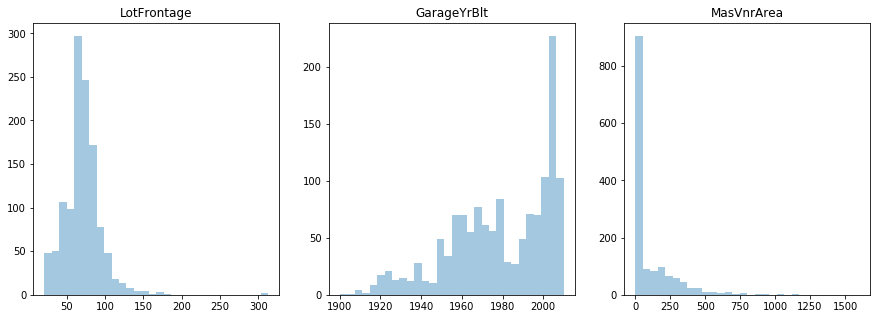

,LotFrontage,GarageYrBlt,MasVnrArea
count,1201.000000,1379.000000,1452.000000
mean,70.049958,1978.506164,103.685262
std,24.284752,24.689725,181.066207
min,21.000000,1900.000000,0.000000
25%,59.000000,1961.000000,0.000000
50%,69.000000,1980.000000,0.000000
75%,80.000000,2002.000000,166.000000
max,313.000000,2010.000000,1600.000000


In [9]:
# 欠損値が存在する列をプロット
import seaborn as sns
%matplotlib inline
fig = plt.figure(figsize=(15, 5))
ax1 = fig.add_subplot(131)
ax1 = sns.distplot(X_df['LotFrontage'].values, kde=False, bins=30, label='LotFrontage')
ax1.set_title('LotFrontage')

ax2 = fig.add_subplot(132)
ax2 = sns.distplot(X_df['GarageYrBlt'].values, kde=False, bins=30, label='GarageYrBlt')
ax2.set_title('GarageYrBlt')

ax3 = fig.add_subplot(133)
ax3 = sns.distplot(X_df['MasVnrArea'].values, kde=False, bins=30, label='MasVnrArea')
ax3.set_title('MasVnrArea')

plt.show()

X_df[['LotFrontage', 'GarageYrBlt', 'MasVnrArea']].describe()

count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64
count    1460.000000
mean       70.306164
std        23.945565
min        21.000000
25%        59.000000
50%        70.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64
count    1460.000000
mean       70.104795
std        23.846996
min        21.000000
25%        59.000000
50%        70.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64


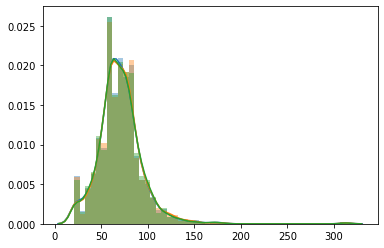

In [10]:
# LotFrontage
print(X_df['LotFrontage'].describe())
print(X_df['LotFrontage'].fillna(method = 'bfill').describe())
print(X_df['LotFrontage'].fillna(method = 'ffill').describe())

sns.distplot(X_df['LotFrontage'].values)
sns.distplot(X_df['LotFrontage'].fillna(method = 'bfill').values)
sns.distplot(X_df['LotFrontage'].fillna(method = 'ffill').values)

count    1379.000000
mean     1978.506164
std        24.689725
min      1900.000000
25%      1961.000000
50%      1980.000000
75%      2002.000000
max      2010.000000
Name: GarageYrBlt, dtype: float64
count    1460.000000
mean     1978.217123
std        24.716517
min      1900.000000
25%      1961.000000
50%      1979.000000
75%      2002.000000
max      2010.000000
Name: GarageYrBlt, dtype: float64
count    1460.000000
mean     1978.543836
std        24.815152
min      1900.000000
25%      1961.000000
50%      1980.000000
75%      2002.000000
max      2010.000000
Name: GarageYrBlt, dtype: float64


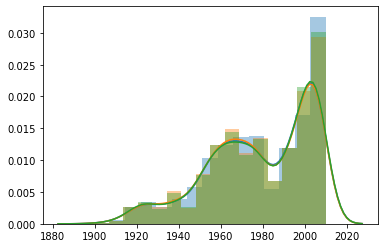

In [11]:
# GarageYrBlt
print(X_df['GarageYrBlt'].describe())
print(X_df['GarageYrBlt'].fillna(method = 'bfill').describe())
print(X_df['GarageYrBlt'].fillna(method = 'ffill').describe())

sns.distplot(X_df['GarageYrBlt'].values)
sns.distplot(X_df['GarageYrBlt'].fillna(method = 'bfill').values)
sns.distplot(X_df['GarageYrBlt'].fillna(method = 'ffill').values)

count    1452.000000
mean      103.685262
std       181.066207
min         0.000000
25%         0.000000
50%         0.000000
75%       166.000000
max      1600.000000
Name: MasVnrArea, dtype: float64
count    1460.000000
mean      103.680822
std       181.190771
min         0.000000
25%         0.000000
50%         0.000000
75%       166.000000
max      1600.000000
Name: MasVnrArea, dtype: float64
count    1460.000000
mean      103.492466
std       180.795612
min         0.000000
25%         0.000000
50%         0.000000
75%       165.250000
max      1600.000000
Name: MasVnrArea, dtype: float64


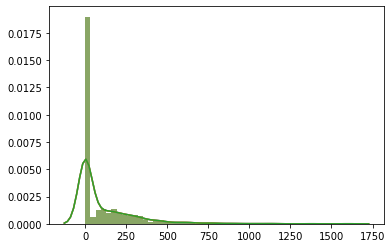

In [12]:
# MasVnrArea
print(X_df['MasVnrArea'].describe())
print(X_df['MasVnrArea'].fillna(method = 'bfill').describe())
print(X_df['MasVnrArea'].fillna(method = 'ffill').describe())

sns.distplot(X_df['MasVnrArea'].values)
sns.distplot(X_df['MasVnrArea'].fillna(method = 'bfill').values)
sns.distplot(X_df['MasVnrArea'].fillna(method = 'ffill').values)

In [13]:
# bfillのほうがやや影響少なそう
# df.fillna(method = 'bfill').fillna(method = 'ffill')
## trainに適用
from sklearn.preprocessing import StandardScaler

### 欠損値処理
X_df_train_filled = X_df_train.select_dtypes(include='number').fillna(method = 'bfill').fillna(method = 'ffill')
print(X_df_train_filled.isnull().sum().sort_values(ascending=False))
X_train = X_df_train_filled.values

### 標準化
scaler = StandardScaler()
scaler.fit(X_train)
X_train_new = scaler.transform(X_train)

YrSold           0
MoSold           0
GrLivArea        0
LowQualFinSF     0
2ndFlrSF         0
1stFlrSF         0
TotalBsmtSF      0
BsmtUnfSF        0
BsmtFinSF2       0
BsmtFinSF1       0
MasVnrArea       0
YearRemodAdd     0
YearBuilt        0
OverallCond      0
OverallQual      0
LotArea          0
LotFrontage      0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
WoodDeckSF       0
MiscVal          0
PoolArea         0
ScreenPorch      0
3SsnPorch        0
EnclosedPorch    0
OpenPorchSF      0
GarageArea       0
HalfBath         0
GarageCars       0
GarageYrBlt      0
Fireplaces       0
TotRmsAbvGrd     0
KitchenAbvGr     0
BedroomAbvGr     0
MSSubClass       0
dtype: int64


In [14]:
## validation
### 欠損値処理
X_df_val_filled = X_df_val.select_dtypes(include='number').fillna(method = 'bfill').fillna(method = 'ffill')
print(X_df_val_filled.isnull().sum().sort_values(ascending=False))
X_val = X_df_val_filled.values

### 標準化
X_val_new = scaler.transform(X_val)

YrSold           0
MoSold           0
GrLivArea        0
LowQualFinSF     0
2ndFlrSF         0
1stFlrSF         0
TotalBsmtSF      0
BsmtUnfSF        0
BsmtFinSF2       0
BsmtFinSF1       0
MasVnrArea       0
YearRemodAdd     0
YearBuilt        0
OverallCond      0
OverallQual      0
LotArea          0
LotFrontage      0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
WoodDeckSF       0
MiscVal          0
PoolArea         0
ScreenPorch      0
3SsnPorch        0
EnclosedPorch    0
OpenPorchSF      0
GarageArea       0
HalfBath         0
GarageCars       0
GarageYrBlt      0
Fireplaces       0
TotRmsAbvGrd     0
KitchenAbvGr     0
BedroomAbvGr     0
MSSubClass       0
dtype: int64


In [15]:
# 学習
reg = ScratchLinearRegression(num_iter=10000, lr=0.01, no_bias=False, verbose=True)
reg.fit(X_train_new, y_train, X_val_new, y_val)

op
loss : train: 652378115.9579802, valid: 426180797.6279145
MSE  : train: 1304756231.9159603, valid: 852361595.255829
9847th loop
loss : train: 652378115.9579579, valid: 426180797.3746284
MSE  : train: 1304756231.9159157, valid: 852361594.7492568
9848th loop
loss : train: 652378115.9579347, valid: 426180797.1215895
MSE  : train: 1304756231.9158695, valid: 852361594.243179
9849th loop
loss : train: 652378115.9579117, valid: 426180796.8687968
MSE  : train: 1304756231.9158235, valid: 852361593.7375937
9850th loop
loss : train: 652378115.9578885, valid: 426180796.6162502
MSE  : train: 1304756231.915777, valid: 852361593.2325004
9851th loop
loss : train: 652378115.9578655, valid: 426180796.36395013
MSE  : train: 1304756231.915731, valid: 852361592.7279003
9852th loop
loss : train: 652378115.9578428, valid: 426180796.1118955
MSE  : train: 1304756231.9156857, valid: 852361592.223791
9853th loop
loss : train: 652378115.9578198, valid: 426180795.8600868
MSE  : train: 1304756231.9156396, valid:

# 【問題7】
## 学習曲線のプロット
学習曲線を表示する関数を作成し、実行してください。グラフを見て損失が適切に下がっているかどうか確認してください。

線形回帰クラスの雛形ではself.loss, self.val_lossに損失を記録しておくようになっているため、入力にはこれを利用してください。

In [16]:
def plot_model_loss(model):
    train_loss = model.loss
    val_loss = model.val_loss

    fig = plt.figure()
    ax = fig.add_subplot(111)

    ax.set_xlabel('iter')
    ax.set_ylabel('loss')
    ax.set_title('model loss')

    ax = plt.plot(range(train_loss.shape[0]), train_loss, label='train_loss')
    ax = plt.plot(range(val_loss.shape[0]), val_loss, label='val_loss')
    
    plt.legend()
    plt.show()

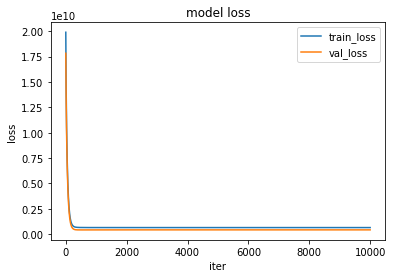

In [17]:
# 可視化
%matplotlib inline
plot_model_loss(reg)

In [18]:
## test
test_df = pd.read_csv('test.csv') 
X_df_test = test_df.iloc[:, 1:]

### 欠損値処理
X_df_test_filled = X_df_test.select_dtypes(include='number').fillna(method = 'bfill').fillna(method = 'ffill')
print(X_df_test_filled.isnull().sum().sort_values(ascending=False))
X_test = X_df_test_filled.values

### 標準化
X_test_new = scaler.transform(X_test)

YrSold           0
MoSold           0
GrLivArea        0
LowQualFinSF     0
2ndFlrSF         0
1stFlrSF         0
TotalBsmtSF      0
BsmtUnfSF        0
BsmtFinSF2       0
BsmtFinSF1       0
MasVnrArea       0
YearRemodAdd     0
YearBuilt        0
OverallCond      0
OverallQual      0
LotArea          0
LotFrontage      0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
WoodDeckSF       0
MiscVal          0
PoolArea         0
ScreenPorch      0
3SsnPorch        0
EnclosedPorch    0
OpenPorchSF      0
GarageArea       0
HalfBath         0
GarageCars       0
GarageYrBlt      0
Fireplaces       0
TotRmsAbvGrd     0
KitchenAbvGr     0
BedroomAbvGr     0
MSSubClass       0
dtype: int64


In [19]:
### 予測
y_test_pred = reg.predict(X_test_new)
display(y_test_pred)

array([[116001.73108326],
       [153812.02591112],
       [170726.29109826],
       ...,
       [169278.63452344],
       [100209.56915751],
       [254373.03063032]])

In [20]:
### 出力
submit_arr = np.concatenate((test_df['Id'].values.reshape(-1, 1), y_test_pred.reshape(-1, 1)), axis=1)
submit_df = pd.DataFrame(submit_arr, columns=['Id', 'SalePrice'])
submit_df['Id'] = submit_df['Id'].astype(np.int32)
display(submit_df)
submit_df.info()
submit_df.to_csv('test_pred.csv', index=False)

,Id,SalePrice
0,1461,116001.731083
1,1462,153812.025911
2,1463,170726.291098
3,1464,200144.211666
4,1465,200345.348981
...,...,...
1454,2915,54932.035909
1455,2916,64628.629413
1456,2917,169278.634523
1457,2918,100209.569158


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Id         1459 non-null   int32  
 1   SalePrice  1459 non-null   float64
dtypes: float64(1), int32(1)
memory usage: 17.2 KB


# 【問題8】
## （アドバンス課題）バイアス項の除去
バイアス項θ0を抜くと学習がどう変化するか検証してください。また、線形回帰モデルにおけるバイアス項の役割の考察・調査を行ってください。

In [21]:
# no_bias=True
## 学習
reg2 = ScratchLinearRegression(num_iter=10000, lr=0.01, no_bias=True, verbose=True)
reg2.fit(X_train_new, y_train, X_val_new, y_val)

, valid: 16670396527.851099
MSE  : train: 34389543935.02469, valid: 33340793055.702198
9848th loop
loss : train: 17194771967.51232, valid: 16670396525.818638
MSE  : train: 34389543935.02464, valid: 33340793051.637276
9849th loop
loss : train: 17194771967.5123, valid: 16670396523.788126
MSE  : train: 34389543935.0246, valid: 33340793047.576252
9850th loop
loss : train: 17194771967.51228, valid: 16670396521.759558
MSE  : train: 34389543935.02456, valid: 33340793043.519115
9851th loop
loss : train: 17194771967.51225, valid: 16670396519.732931
MSE  : train: 34389543935.0245, valid: 33340793039.465862
9852th loop
loss : train: 17194771967.512234, valid: 16670396517.70824
MSE  : train: 34389543935.02447, valid: 33340793035.41648
9853th loop
loss : train: 17194771967.512207, valid: 16670396515.685493
MSE  : train: 34389543935.024414, valid: 33340793031.370987
9854th loop
loss : train: 17194771967.512188, valid: 16670396513.66468
MSE  : train: 34389543935.024376, valid: 33340793027.32936
9855t

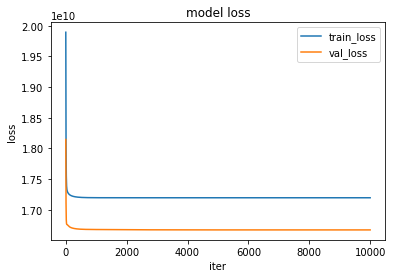

In [22]:
## 可視化
%matplotlib inline
plot_model_loss(reg2)

In [23]:
print(reg.coef_)

[[ 1.81892242e+05]
 [-8.45986431e+03]
 [-1.77140319e+03]
 [ 4.64319546e+03]
 [ 2.65327993e+04]
 [ 4.93287508e+03]
 [ 6.66170958e+03]
 [ 2.34350607e+03]
 [ 5.07153318e+03]
 [ 3.66199000e+03]
 [-3.59243709e+02]
 [ 5.08726080e+01]
 [ 3.68122518e+03]
 [ 7.56992143e+03]
 [ 7.46796368e+03]
 [-4.40273330e+02]
 [ 1.15837613e+04]
 [ 6.37019349e+03]
 [ 2.81799405e+02]
 [ 4.14356325e+03]
 [ 6.09825695e+02]
 [-7.73746086e+03]
 [-2.60116632e+03]
 [ 1.04938383e+04]
 [ 2.96450933e+03]
 [ 3.31852804e+03]
 [ 9.03488099e+03]
 [-1.29930343e+03]
 [ 2.76419937e+03]
 [-3.43174240e+02]
 [-4.33133407e+02]
 [ 2.51316709e+02]
 [ 3.84405586e+03]
 [-1.23087418e+03]
 [-3.01324152e+02]
 [-2.41237461e+02]
 [-1.00457793e+03]]


# 結果と考察
バイアス項ありの場合と比べ、 **かなり精度が下がった。**

これは予測関数（問題1）のバイアス項が無くなったことで、線形回帰によって求められた回帰直線において **(x1, x2, ...., xn) = (0, 0, ..., 0)の時に必ず0を出力しなければならなくなった** ためであると考えられる。（＝回帰直線のフィット能力が落ちた）

今回の住宅価格予測においては、住宅の価格にある程度のオフセットが存在する（家を売る際には常にある程度の価格がつけられる）ため、精度低下が顕著であった。

以上のことから、バイアス項は **回帰直線の多様性を担保し、精度を向上させる** ことに役立っていると考えられる。

目的変数を標準化することで、平均値がゼロに近づきバイアス項の影響が少なくなる可能性があるため、検証する。

In [24]:
# 目的変数の標準化
scaler_y = StandardScaler()
scaler_y.fit(y_train)
y_train_std = scaler_y.transform(y_train)
y_val_std = scaler_y.transform(y_val) 

In [25]:
# バイアス項あり - 学習
reg3 = ScratchLinearRegression(num_iter=10000, lr=0.01, no_bias=False, verbose=True)
reg3.fit(X_train_new, y_train_std, X_val_new, y_val_std)

n: 0.09731946409756305, valid: 0.0635765078013317
MSE  : train: 0.1946389281951261, valid: 0.1271530156026634
9854th loop
loss : train: 0.09731946409741447, valid: 0.0635765073738491
MSE  : train: 0.19463892819482895, valid: 0.1271530147476982
9855th loop
loss : train: 0.09731946409726615, valid: 0.06357650694683083
MSE  : train: 0.1946389281945323, valid: 0.12715301389366165
9856th loop
loss : train: 0.09731946409711814, valid: 0.06357650652027642
MSE  : train: 0.19463892819423628, valid: 0.12715301304055285
9857th loop
loss : train: 0.09731946409697037, valid: 0.06357650609418534
MSE  : train: 0.19463892819394074, valid: 0.1271530121883707
9858th loop
loss : train: 0.09731946409682295, valid: 0.0635765056685571
MSE  : train: 0.1946389281936459, valid: 0.1271530113371142
9859th loop
loss : train: 0.09731946409667583, valid: 0.0635765052433912
MSE  : train: 0.19463892819335166, valid: 0.1271530104867824
9860th loop
loss : train: 0.0973194640965289, valid: 0.06357650481868708
MSE  : tra

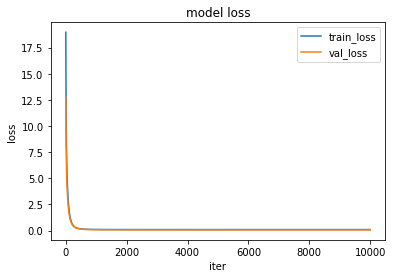

In [26]:
# バイアス項あり - 可視化
%matplotlib inline
plot_model_loss(reg3)

In [27]:
# バイアス項なし - 学習
reg4 = ScratchLinearRegression(num_iter=10000, lr=0.01, no_bias=True, verbose=True)
reg4.fit(X_train_new, y_train_std, X_val_new, y_val_std)

946402563733, valid: 0.06357610031910418
MSE  : train: 0.19463892805127467, valid: 0.12715220063820837
9854th loop
loss : train: 0.0973194640256272, valid: 0.06357610031039605
MSE  : train: 0.1946389280512544, valid: 0.1271522006207921
9855th loop
loss : train: 0.09731946402561706, valid: 0.063576100301716
MSE  : train: 0.19463892805123412, valid: 0.127152200603432
9856th loop
loss : train: 0.09731946402560691, valid: 0.06357610029306396
MSE  : train: 0.19463892805121383, valid: 0.12715220058612792
9857th loop
loss : train: 0.0973194640255968, valid: 0.06357610028443993
MSE  : train: 0.1946389280511936, valid: 0.12715220056887985
9858th loop
loss : train: 0.0973194640255867, valid: 0.0635761002758438
MSE  : train: 0.1946389280511734, valid: 0.1271522005516876
9859th loop
loss : train: 0.09731946402557662, valid: 0.06357610026727557
MSE  : train: 0.19463892805115324, valid: 0.12715220053455115
9860th loop
loss : train: 0.09731946402556656, valid: 0.06357610025873518
MSE  : train: 0.1946

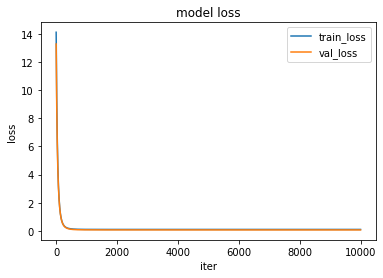

In [28]:
# バイアス項なし - 可視化
%matplotlib inline
plot_model_loss(reg4)

In [29]:
print(reg3.coef_)

[[-5.75725095e-16]
 [-1.03325704e-01]
 [-2.16353054e-02]
 [ 5.67112008e-02]
 [ 3.24067824e-01]
 [ 6.02474414e-02]
 [ 8.13643074e-02]
 [ 2.86246562e-02]
 [ 6.19425633e-02]
 [-1.45126350e-01]
 [-7.01402885e-02]
 [-1.83091206e-01]
 [ 2.30082263e-01]
 [ 2.08253795e-02]
 [ 1.20702549e-02]
 [-1.43798948e-02]
 [ 2.38943815e-01]
 [ 7.78045348e-02]
 [ 3.44198807e-03]
 [ 5.06130797e-02]
 [ 7.45090327e-03]
 [-9.45049113e-02]
 [-3.17710632e-02]
 [ 1.28176621e-01]
 [ 3.62089575e-02]
 [ 4.05279097e-02]
 [ 1.10331428e-01]
 [-1.58509933e-02]
 [ 3.37614682e-02]
 [-4.19207017e-03]
 [-5.29057970e-03]
 [ 3.06963174e-03]
 [ 4.69508083e-02]
 [-1.50337219e-02]
 [-3.68051645e-03]
 [-2.94596546e-03]
 [-1.22699501e-02]]


予想通り、損失関数・MSEともにバイアス項あり・なしでほとんど差が見られなかった。

パラメータベクトルを見ても、バイアス項（reg.coef_\[0\]）は他のパラメータに比べ明らかに小さくなっている。

In [30]:
y_test_pred = scaler_y.inverse_transform(reg3.predict(X_test_new))
### 出力
submit_arr = np.concatenate((test_df['Id'].values.reshape(-1, 1), y_test_pred.reshape(-1, 1)), axis=1)
submit_df = pd.DataFrame(submit_arr, columns=['Id', 'SalePrice'])
submit_df['Id'] = submit_df['Id'].astype(np.int32)
display(submit_df)
submit_df.info()
submit_df.to_csv('test_pred_std.csv', index=False)

,Id,SalePrice
0,1461,116004.919000
1,1462,153811.908199
2,1463,170725.750750
3,1464,200144.047654
4,1465,200345.352173
...,...,...
1454,2915,54932.124406
1455,2916,64629.213318
1456,2917,169279.039425
1457,2918,100209.843284


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Id         1459 non-null   int32  
 1   SalePrice  1459 non-null   float64
dtypes: float64(1), int32(1)
memory usage: 17.2 KB


# 【問題9】
## （アドバンス課題）特徴量の多次元化
特徴量の二乗や三乗を入力に利用すると学習結果がどう変化するか検証してください。

収束した線形回帰モデルのパラメータベクトルから絶対値が大きい（＝予測結果への寄与率が大きい）特徴量を選び、そこから新たな特徴量を作る。

-> `sklearn.preprocessing.PolynomialFeatures`

In [54]:
# 回帰係数ランキング - reg
features = np.concatenate(([1], np.array(X_df_num.columns))).reshape(-1, 1)

feature_importances = np.concatenate((features, reg.coef_), axis=1)
sorted_indexes = np.flip(np.argsort(abs(feature_importances[:, 1])))

top5_features = feature_importances[sorted_indexes[1:6], 0]

print(f'top5: {top5_features}')

for i in sorted_indexes[1:]:
    print(feature_importances[i, :])

top5: ['OverallQual' 'GrLivArea' 'TotRmsAbvGrd' 'GarageCars' 'MSSubClass']
['OverallQual' 26532.799312311567]
['GrLivArea' 11583.761255124631]
['TotRmsAbvGrd' 10493.83825184164]
['GarageCars' 9034.880989392728]
['MSSubClass' -8459.864314485663]
['BedroomAbvGr' -7737.4608568295425]
['1stFlrSF' 7569.921432211108]
['2ndFlrSF' 7467.963678702159]
['YearBuilt' 6661.709578716418]
['BsmtFullBath' 6370.193489968082]
['MasVnrArea' 5071.533184160136]
['OverallCond' 4932.87508144584]
['LotArea' 4643.195464780584]
['FullBath' 4143.563252701485]
['ScreenPorch' 3844.055861365055]
['TotalBsmtSF' 3681.225180655081]
['BsmtFinSF1' 3661.9899955896726]
['GarageYrBlt' 3318.528039616726]
['Fireplaces' 2964.5093275113804]
['WoodDeckSF' 2764.199373202549]
['KitchenAbvGr' -2601.1663240621274]
['YearRemodAdd' 2343.5060682586386]
['LotFrontage' -1771.4031928411878]
['GarageArea' -1299.3034336352505]
['PoolArea' -1230.8741799200768]
['YrSold' -1004.5779323115987]
['HalfBath' 609.8256953009967]
['LowQualFinSF' -440

In [80]:
# 特徴量作成 - train
from sklearn.preprocessing import PolynomialFeatures
features_train_base = X_df_train_filled[top5_features].values
print(f'base: {features_train_base.shape}')

# 0~2次までの項 include_biasで0次を除外 スライスして1次も除外
poly2 = PolynomialFeatures(degree=2, include_bias=False)
features_train_2D = poly2.fit_transform(features_train_base)[:, 5:]
print(f'2D: {features_train_2D.shape}')

# 0~3次までの項 include_biasで0次を除外 スライスして1次も除外
poly3 = PolynomialFeatures(degree=3, include_bias=False)
features_train_3D = poly3.fit_transform(features_train_base)[:, 5:]
print(f'3D: {features_train_3D.shape}')

base: (1095, 5)
2D: (1095, 15)
3D: (1095, 50)


# 1. 2次の項を利用

In [82]:
# 訓練データ作成
X_train_2D = np.concatenate((X_df_train_filled.values, features_train_2D), axis=1)

# 標準化
scaler = StandardScaler()
scaler.fit(X_train_2D)
X_train_2D_new = scaler.transform(X_train_2D)

print(X_train_2D_new.shape)
display(X_train_2D_new)

(1095, 51)


array([[ 0.79214727, -0.66289773, -0.01342632, ..., -1.02009054,
        -0.08555951,  0.39818781],
       [-0.84357709, -0.66289773,  0.17824   , ..., -1.02009054,
        -0.89922407, -0.58408801],
       [ 0.32479745, -0.66289773, -0.3699007 , ..., -1.02009054,
        -0.3180351 , -0.01003071],
       ...,
       [ 0.79214727,  1.2028912 ,  1.26934606, ...,  0.12009232,
         0.96058064,  0.39818781],
       [-0.25938982, -0.50065521, -0.39211901, ..., -1.02009054,
        -0.60862959, -0.37678954],
       [-0.14255236, -0.9062615 ,  0.18270151, ...,  0.12009232,
         0.03067829, -0.3161946 ]])

In [85]:
# バリデーションデータ
features_val_base = X_df_val_filled[top5_features].values
features_val_2D = poly2.fit_transform(features_val_base)[:, 5:]

X_val_2D = np.concatenate((X_df_val_filled.values, features_val_2D), axis=1)

# 標準化
X_val_2D_new = scaler.transform(X_val_2D)

print(X_val_2D_new.shape)
display(X_val_2D_new)

(365, 51)


array([[-0.84357709, -0.01392767, -0.21187414, ..., -1.02009054,
        -0.89922407, -0.58408801],
       [ 0.67530982, -0.01392767, -0.20785878, ...,  0.12009232,
         0.84434285,  0.28656556],
       [-0.84357709, -0.01392767, -0.23685858, ...,  0.12009232,
        -0.66674848, -0.58408801],
       ...,
       [ 0.32479745, -0.82514025, -0.20295112, ..., -1.02009054,
        -0.3180351 , -0.01003071],
       [ 0.09112254, -0.01392767,  0.03859484, ...,  0.12009232,
         0.26315388, -0.17586949],
       [-0.84357709,  0.22943611, -0.10560105, ...,  2.02039709,
        -0.43427289, -0.58408801]])

In [117]:
# 学習
reg5 = ScratchLinearRegression(num_iter=10000, lr=0.01, no_bias=False, verbose=True)
reg5.fit(X_train_2D_new, y_train, X_val_2D_new, y_val)

, valid: 428032916.1002015
MSE  : train: 852440819.0848492, valid: 856065832.200403
9846th loop
loss : train: 426216749.1626928, valid: 428040085.70518893
MSE  : train: 852433498.3253856, valid: 856080171.4103779
9847th loop
loss : train: 426213089.39949274, valid: 428047254.8385324
MSE  : train: 852426178.7989855, valid: 856094509.6770648
9848th loop
loss : train: 426209430.2526739, valid: 428054423.5002282
MSE  : train: 852418860.5053478, valid: 856108847.0004565
9849th loop
loss : train: 426205771.72208667, valid: 428061591.6902717
MSE  : train: 852411543.4441733, valid: 856123183.3805434
9850th loop
loss : train: 426202113.80758053, valid: 428068759.4086586
MSE  : train: 852404227.6151611, valid: 856137518.8173172
9851th loop
loss : train: 426198456.50900567, valid: 428075926.6553849
MSE  : train: 852396913.0180113, valid: 856151853.3107698
9852th loop
loss : train: 426194799.8262119, valid: 428083093.43044573
MSE  : train: 852389599.6524239, valid: 856166186.8608915
9853th loop
lo

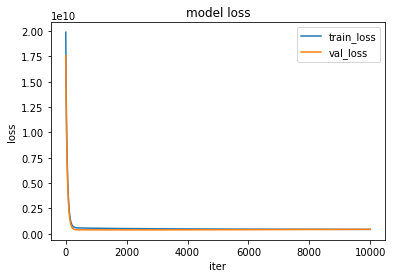

In [118]:
# 可視化
%matplotlib inline
plot_model_loss(reg5)

# 2. 3次の項を利用

In [88]:
# 訓練データ作成
X_train_3D = np.concatenate((X_df_train_filled.values, features_train_3D), axis=1)

# 標準化
scaler = StandardScaler()
scaler.fit(X_train_3D)
X_train_3D_new = scaler.transform(X_train_3D)

print(X_train_3D_new.shape)
display(X_train_3D_new)

(1095, 86)


array([[ 0.79214727, -0.66289773, -0.01342632, ..., -0.51159965,
        -0.01271697,  0.09309058],
       [-0.84357709, -0.66289773,  0.17824   , ..., -0.83111495,
        -0.57988528, -0.42786101],
       [ 0.32479745, -0.66289773, -0.3699007 , ..., -0.60288974,
        -0.24842328, -0.18580999],
       ...,
       [ 0.79214727,  1.2028912 ,  1.26934606, ...,  0.72081652,
         0.58391462,  0.09309058],
       [-0.25938982, -0.50065521, -0.39211901, ..., -0.71700235,
        -0.46019067, -0.36779984],
       [-0.14255236, -0.9062615 ,  0.18270151, ..., -0.00950417,
        -0.24105746, -0.34332379]])

In [89]:
# バリデーションデータ
features_val_base = X_df_val_filled[top5_features].values
features_val_3D = poly3.fit_transform(features_val_base)[:, 5:]

X_val_3D = np.concatenate((X_df_val_filled.values, features_val_3D), axis=1)

# 標準化
X_val_3D_new = scaler.transform(X_val_3D)

print(X_val_3D_new.shape)
display(X_val_3D_new)

(365, 86)


array([[-0.84357709, -0.01392767, -0.21187414, ..., -0.83111495,
        -0.57988528, -0.42786101],
       [ 0.67530982, -0.01392767, -0.20785878, ...,  0.62952643,
         0.45501273,  0.01008876],
       [-0.84357709, -0.01392767, -0.23685858, ..., -0.55724469,
        -0.55042199, -0.42786101],
       ...,
       [ 0.32479745, -0.82514025, -0.20295112, ..., -0.60288974,
        -0.24842328, -0.18580999],
       [ 0.09112254, -0.01392767,  0.03859484, ...,  0.173076  ,
        -0.07900937, -0.27757262],
       [-0.84357709,  0.22943611, -0.10560105, ..., -0.10079426,
        -0.5209587 , -0.42786101]])

In [119]:
# 学習
reg6 = ScratchLinearRegression(num_iter=10000, lr=0.01, no_bias=False, verbose=True)
reg6.fit(X_train_3D_new, y_train, X_val_3D_new, y_val)

67
9846th loop
loss : train: 337232700.4987432, valid: 539048588.1745061
MSE  : train: 674465400.9974864, valid: 1078097176.3490121
9847th loop
loss : train: 337231495.0352891, valid: 539049596.1770784
MSE  : train: 674462990.0705782, valid: 1078099192.3541567
9848th loop
loss : train: 337230289.7218518, valid: 539050603.8715099
MSE  : train: 674460579.4437037, valid: 1078101207.7430198
9849th loop
loss : train: 337229084.5583864, valid: 539051611.2579608
MSE  : train: 674458169.1167728, valid: 1078103222.5159216
9850th loop
loss : train: 337227879.54484785, valid: 539052618.3365898
MSE  : train: 674455759.0896957, valid: 1078105236.6731796
9851th loop
loss : train: 337226674.6811916, valid: 539053625.1075565
MSE  : train: 674453349.3623832, valid: 1078107250.215113
9852th loop
loss : train: 337225469.9673728, valid: 539054631.5710208
MSE  : train: 674450939.9347456, valid: 1078109263.1420417
9853th loop
loss : train: 337224265.4033468, valid: 539055637.7271416
MSE  : train: 674448530.

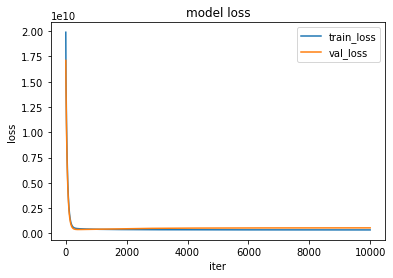

In [120]:
# 可視化
%matplotlib inline
plot_model_loss(reg6)

# 結果と考察
収束の速度は1次元モデルに比べあまり変わらなかった。

また、両方のモデルにおいて10000イテレーションの計算を行ったところ、途中からバリデーションのスコアが悪化していった。

過学習していることが予想されるため、詳細なプロットでスコア推移を確認する。

In [121]:
# 範囲を狭めてプロットを行う
def plot_model_loss_detail(model):
    train_loss = model.loss
    val_loss = model.val_loss

    fig = plt.figure()
    ax = fig.add_subplot(111)

    ax.set_xlabel('iter')
    ax.set_ylabel('loss')
    ax.set_ylim(0, 0.10e10)
    ax.set_title('model loss detail')

    ax = plt.plot(range(train_loss.shape[0])二字train_loss, label='train_loss')
    ax = plt.plot(range(val_loss.shape[0]), val_loss, label='val_loss')
    
    plt.legend()
    plt.show()

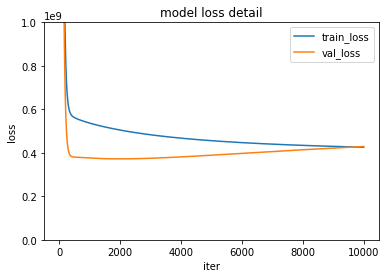

In [122]:
# 詳細可視化 - 2次
%matplotlib inline
plot_model_loss_detail(reg5)

In [148]:
# loss最小値 - 2次
print(f'min loss train: {np.argmin(reg5.loss)+1}th loop: {np.min(reg5.loss)}')
print(f'min loss val  : {np.argmin(reg5.val_loss)+1}th loop: {np.min(reg5.val_loss)}')

min loss train: 10000th loop: 425660318.66346073
min loss val  : 1975th loop: 372201414.108637


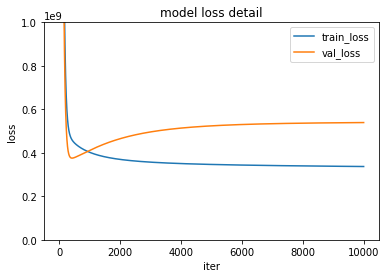

In [123]:
# 詳細可視化 - 3次
%matplotlib inline
plot_model_loss_detail(reg6)

In [149]:
# loss最小値 - 3次
print(f'min loss train: {np.argmin(reg6.loss)+1}th loop: {np.min(reg6.loss)}')
print(f'min loss val  : {np.argmin(reg6.val_loss)+1}th loop: {np.min(reg6.val_loss)}')

min loss train: 10000th loop: 337048800.1328459
min loss val  : 420th loop: 375613392.9010525


明らかに過学習していることが分かる。

そこで、2次のiterationを2000, 3次のiterationを500として再度学習を行う。

In [152]:
# 2D
reg7 = ScratchLinearRegression(num_iter=2000, lr=0.01, no_bias=False, verbose=True)
reg7.fit(X_train_2D_new, y_train, X_val_2D_new, y_val)

802, valid: 744513450.1255084
1847th loop
loss : train: 508699660.1140398, valid: 372255867.7076927
MSE  : train: 1017399320.2280796, valid: 744511735.4153854
1848th loop
loss : train: 508672324.9771434, valid: 372255017.23795664
MSE  : train: 1017344649.9542868, valid: 744510034.4759133
1849th loop
loss : train: 508645000.5069539, valid: 372254173.6497558
MSE  : train: 1017290001.0139078, valid: 744508347.2995116
1850th loop
loss : train: 508617686.6968323, valid: 372253336.9393006
MSE  : train: 1017235373.3936646, valid: 744506673.8786012
1851th loop
loss : train: 508590383.54014856, valid: 372252507.1028027
MSE  : train: 1017180767.0802971, valid: 744505014.2056054
1852th loop
loss : train: 508563091.0302799, valid: 372251684.1364748
MSE  : train: 1017126182.0605597, valid: 744503368.2729496
1853th loop
loss : train: 508535809.16061276, valid: 372250868.036531
MSE  : train: 1017071618.3212255, valid: 744501736.073062
1854th loop
loss : train: 508508537.92454135, valid: 372250058.799

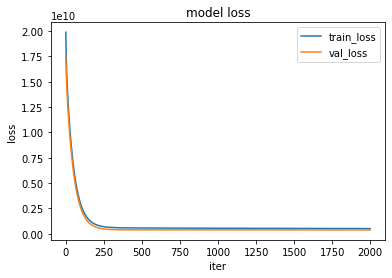

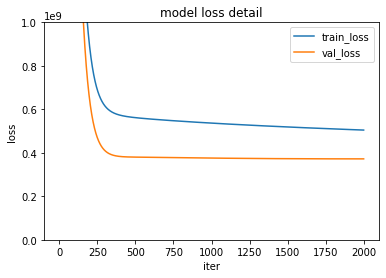

In [153]:
# 可視化 - 2次
%matplotlib inline
plot_model_loss(reg7)
plot_model_loss_detail(reg7)

In [154]:
# loss最小値 - 2次
print(f'min loss train: {np.argmin(reg7.loss)+1}th loop: {np.min(reg7.loss)}')
print(f'min loss val  : {np.argmin(reg7.val_loss)+1}th loop: {np.min(reg7.val_loss)}')

min loss train: 2000th loop: 504637701.4670916
min loss val  : 1976th loop: 372201659.43892986


In [155]:
# 3D
reg8 = ScratchLinearRegression(num_iter=500, lr=0.01, no_bias=False, verbose=True)
reg8.fit(X_train_3D_new, y_train, X_val_3D_new, y_val)

56, valid: 382529105.3504299
MSE  : train: 969161514.8187312, valid: 765058210.7008598
345th loop
loss : train: 484072177.19920194, valid: 382290228.70379984
MSE  : train: 968144354.3984039, valid: 764580457.4075997
346th loop
loss : train: 483570645.98479193, valid: 382057490.473277
MSE  : train: 967141291.9695839, valid: 764114980.946554
347th loop
loss : train: 483076029.93364567, valid: 381830766.7232979
MSE  : train: 966152059.8672913, valid: 763661533.4465958
348th loop
loss : train: 482588197.8563847, valid: 381609936.01404727
MSE  : train: 965176395.7127694, valid: 763219872.0280945
349th loop
loss : train: 482107021.15422493, valid: 381394879.3514616
MSE  : train: 964214042.3084499, valid: 762789758.7029232
350th loop
loss : train: 481632373.7675059, valid: 381185480.13823074
MSE  : train: 963264747.5350118, valid: 762370960.2764615
351th loop
loss : train: 481164132.12524325, valid: 380981624.12577665
MSE  : train: 962328264.2504865, valid: 761963248.2515533
352th loop
loss :

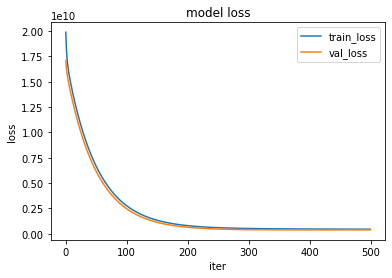

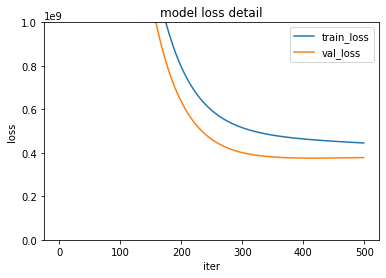

In [156]:
# 可視化 - 3次
%matplotlib inline
plot_model_loss(reg8)
plot_model_loss_detail(reg8)

In [157]:
# loss最小値 - 3次
print(f'min loss train: {np.argmin(reg8.loss)+1}th loop: {np.min(reg8.loss)}')
print(f'min loss val  : {np.argmin(reg8.val_loss)+1}th loop: {np.min(reg8.val_loss)}')

min loss train: 500th loop: 445378855.185647
min loss val  : 420th loop: 375615776.8627953


可視化および損失関数の通り、1次回帰に比べ精度が向上し過学習も抑えられている。

# plus alpha 1
## 学習率の調整
3次の項を追加した際、iterationが500と少なくなってしまったので学習率の調整によって過学習を防止してみる。

In [185]:
# 3D
reg9 = ScratchLinearRegression(num_iter=4250, lr=0.001, no_bias=False, verbose=True)
reg9.fit(X_train_3D_new, y_train, X_val_3D_new, y_val)

261994.5975842, valid: 751519164.6187091
4096th loop
loss : train: 461606731.5530331, valid: 375757780.97376835
MSE  : train: 923213463.1060662, valid: 751515561.9475367
4097th loop
loss : train: 461582487.3140195, valid: 375755996.53000695
MSE  : train: 923164974.628039, valid: 751511993.0600139
4098th loop
loss : train: 461558264.5440708, valid: 375754228.9438144
MSE  : train: 923116529.0881416, valid: 751508457.8876288
4099th loop
loss : train: 461534063.2055806, valid: 375752478.18100387
MSE  : train: 923068126.4111612, valid: 751504956.3620077
4100th loop
loss : train: 461509883.2610153, valid: 375750744.20745885
MSE  : train: 923019766.5220306, valid: 751501488.4149177
4101th loop
loss : train: 461485724.672916, valid: 375749026.9891321
MSE  : train: 922971449.345832, valid: 751498053.9782642
4102th loop
loss : train: 461461587.403896, valid: 375747326.49204564
MSE  : train: 922923174.807792, valid: 751494652.9840913
4103th loop
loss : train: 461437471.4166423, valid: 375745642.6

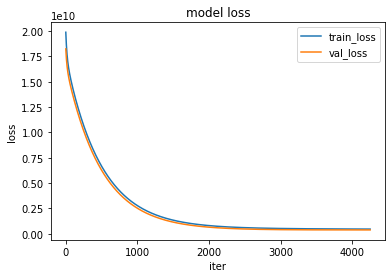

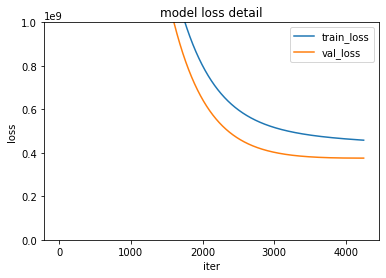

In [186]:
# 可視化 - 3次
%matplotlib inline
plot_model_loss(reg9)
plot_model_loss_detail(reg9)

In [187]:
# loss最小値 - 3次
print(f'min loss train: {np.argmin(reg9.loss)+1}th loop: {np.min(reg9.loss)}')
print(f'min loss val  : {np.argmin(reg9.val_loss)+1}th loop: {np.min(reg9.val_loss)}')

min loss train: 4250th loop: 458105163.10455364
min loss val  : 4216th loop: 375654956.56802475


学習率を0.001に設定したところ、4200回ちょっとで最適解にたどりつくことができ、十分にiterationを回すことができた。

# plus alpha 2
## 相関係数の可視化
同じような特徴量を掛け合わせているので多重共線性が起こっている可能性あり。

In [205]:
# tick labels
arr_1D = np.array(X_df_val_filled.columns)
arr_2D = np.repeat(['2D'], 15)
arr_3D = np.repeat(['3D'], 35)
feature_degrees = np.concatenate((arr_1D, arr_2D, arr_3D, ['SalePrice']))
print(feature_degrees)
print(feature_degrees.shape)

['MSSubClass' 'LotFrontage' 'LotArea' 'OverallQual' 'OverallCond'
 'YearBuilt' 'YearRemodAdd' 'MasVnrArea' 'BsmtFinSF1' 'BsmtFinSF2'
 'BsmtUnfSF' 'TotalBsmtSF' '1stFlrSF' '2ndFlrSF' 'LowQualFinSF'
 'GrLivArea' 'BsmtFullBath' 'BsmtHalfBath' 'FullBath' 'HalfBath'
 'BedroomAbvGr' 'KitchenAbvGr' 'TotRmsAbvGrd' 'Fireplaces' 'GarageYrBlt'
 'GarageCars' 'GarageArea' 'WoodDeckSF' 'OpenPorchSF' 'EnclosedPorch'
 '3SsnPorch' 'ScreenPorch' 'PoolArea' 'MiscVal' 'MoSold' 'YrSold' '2D'
 '2D' '2D' '2D' '2D' '2D' '2D' '2D' '2D' '2D' '2D' '2D' '2D' '2D' '2D'
 '3D' '3D' '3D' '3D' '3D' '3D' '3D' '3D' '3D' '3D' '3D' '3D' '3D' '3D'
 '3D' '3D' '3D' '3D' '3D' '3D' '3D' '3D' '3D' '3D' '3D' '3D' '3D' '3D'
 '3D' '3D' '3D' '3D' '3D' '3D' '3D' 'SalePrice']
(87,)


In [206]:
# 3次の訓練データをもとに相関行列を表示
tmp_df = pd.DataFrame(np.concatenate((X_train_3D, y_train), axis=1), columns=feature_degrees)
display(tmp_df)

df_corr = tmp_df.corr()
display(df_corr)

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,2D,2D,2D,2D,2D,2D,2D,2D,2D,2D,2D,2D,2D,2D,2D,3D,3D,3D,3D,3D,3D,3D,3D,3D,3D,3D,3D,3D,3D,3D,3D,3D,3D,3D,3D,3D,3D,3D,3D,3D,3D,3D,3D,3D,3D,3D,3D,3D,3D,3D,SalePrice
0,90.0,54.0,10624.0,5.0,4.0,1964.0,1964.0,84.0,40.0,264.0,1424.0,1728.0,1728.0,0.0,0.0,1728.0,0.0,1.0,2.0,0.0,6.0,2.0,10.0,0.0,2002.0,1.0,352.0,155.0,0.0,0.0,0.0,0.0,0.0,0.0,11.0,2007.0,25.0,8640.0,50.0,5.0,450.0,2985984.0,17280.0,1728.0,155520.0,100.0,10.0,900.0,1.0,90.0,8100.0,125.0,43200.0,250.0,25.0,2250.0,14929920.0,86400.0,8640.0,777600.0,500.0,50.0,4500.0,5.0,450.0,40500.0,5.159780e+09,29859840.0,2985984.0,268738560.0,172800.0,17280.0,1555200.0,1728.0,155520.0,13996800.0,1000.0,100.0,9000.0,10.0,900.0,81000.0,1.0,90.0,8100.0,729000.0,119000.0
1,20.0,54.0,12772.0,6.0,8.0,1960.0,1998.0,0.0,498.0,0.0,460.0,958.0,958.0,0.0,0.0,958.0,0.0,0.0,1.0,0.0,2.0,1.0,5.0,0.0,1960.0,1.0,301.0,0.0,0.0,0.0,0.0,0.0,0.0,15500.0,4.0,2007.0,36.0,5748.0,30.0,6.0,120.0,917764.0,4790.0,958.0,19160.0,25.0,5.0,100.0,1.0,20.0,400.0,216.0,34488.0,180.0,36.0,720.0,5506584.0,28740.0,5748.0,114960.0,150.0,30.0,600.0,6.0,120.0,2400.0,8.792179e+08,4588820.0,917764.0,18355280.0,23950.0,4790.0,95800.0,958.0,19160.0,383200.0,125.0,25.0,500.0,5.0,100.0,2000.0,1.0,20.0,400.0,8000.0,151500.0
2,70.0,54.0,6629.0,6.0,6.0,1925.0,1950.0,0.0,551.0,0.0,121.0,672.0,697.0,672.0,0.0,1369.0,1.0,0.0,2.0,0.0,3.0,1.0,6.0,0.0,1930.0,1.0,300.0,147.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,2009.0,36.0,8214.0,36.0,6.0,420.0,1874161.0,8214.0,1369.0,95830.0,36.0,6.0,420.0,1.0,70.0,4900.0,216.0,49284.0,216.0,36.0,2520.0,11244966.0,49284.0,8214.0,574980.0,216.0,36.0,2520.0,6.0,420.0,29400.0,2.565726e+09,11244966.0,1874161.0,131191270.0,49284.0,8214.0,574980.0,1369.0,95830.0,6708100.0,216.0,36.0,2520.0,6.0,420.0,29400.0,1.0,70.0,4900.0,343000.0,103600.0
3,50.0,52.0,6240.0,6.0,6.0,1934.0,1950.0,0.0,0.0,0.0,816.0,816.0,816.0,0.0,360.0,1176.0,0.0,0.0,1.0,0.0,3.0,1.0,6.0,1.0,1985.0,2.0,528.0,112.0,0.0,0.0,0.0,0.0,0.0,400.0,9.0,2006.0,36.0,7056.0,36.0,12.0,300.0,1382976.0,7056.0,2352.0,58800.0,36.0,12.0,300.0,4.0,100.0,2500.0,216.0,42336.0,216.0,72.0,1800.0,8297856.0,42336.0,14112.0,352800.0,216.0,72.0,1800.0,24.0,600.0,15000.0,1.626380e+09,8297856.0,2765952.0,69148800.0,42336.0,14112.0,352800.0,4704.0,117600.0,2940000.0,216.0,72.0,1800.0,24.0,600.0,15000.0,8.0,200.0,5000.0,125000.0,114500.0
4,60.0,82.0,12438.0,8.0,5.0,2006.0,2006.0,466.0,0.0,0.0,1234.0,1234.0,1264.0,1312.0,0.0,2576.0,0.0,0.0,2.0,1.0,4.0,1.0,10.0,1.0,2006.0,3.0,666.0,324.0,100.0,0.0,0.0,0.0,0.0,0.0,7.0,2006.0,64.0,20608.0,80.0,24.0,480.0,6635776.0,25760.0,7728.0,154560.0,100.0,30.0,600.0,9.0,180.0,3600.0,512.0,164864.0,640.0,192.0,3840.0,53086208.0,206080.0,61824.0,1236480.0,800.0,240.0,4800.0,72.0,1440.0,28800.0,1.709376e+10,66357760.0,19907328.0,398146560.0,257600.0,77280.0,1545600.0,23184.0,463680.0,9273600.0,1000.0,300.0,6000.0,90.0,1800.0,36000.0,27.0,540.0,10800.0,216000.0,361919.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1090,60.0,57.0,8773.0,6.0,5.0,1997.0,1997.0,0.0,0.0,0.0,916.0,916.0,916.0,684.0,0.0,1600.0,0.0,0.0,2.0,1.0,3.0,1.0,7.0,1.0,1997.0,2.0,460.0,100.0,38.0,0.0,0.0,0.0,0.0,0.0,8.0,2007.0,36.0,9600.0,42.0,12.0,360.0,2560000.0,11200.0,3200.0,96000.0,49.0,14.0,420.0,4.0,120.0,3600.0,216.0,57600.0,252.0,72.0,2160.0,15360000.0,67200.0,19200.0,576000.0,294.0,84.0,2520.0,2

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,2D,2D,2D,2D,2D,2D,2D,2D,2D,2D,2D,2D,2D,2D,2D,3D,3D,3D,3D,3D,3D,3D,3D,3D,3D,3D,3D,3D,3D,3D,3D,3D,3D,3D,3D,3D,3D,3D,3D,3D,3D,3D,3D,3D,3D,3D,3D,3D,3D,3D,SalePrice
MSSubClass,1.000000,-0.297972,-0.111559,0.011857,-0.053740,0.007898,0.031463,0.036078,-0.078199,-0.082073,-0.129214,-0.237582,-0.257332,0.331297,0.053442,0.084818,0.016634,-0.046145,0.137549,0.187647,-0.003315,0.305190,0.060900,-0.032867,0.089489,-0.046728,-0.103976,-0.008743,0.000285,-0.004817,-0.050532,-0.022967,0.013495,-0.001098,-0.026243,-0.008204,-0.000628,0.037442,0.016976,-0.048532,0.939156,0.068826,0.081829,-0.005444,0.859498,0.083820,-0.030124,0.894888,-0.040790,0.763429,0.956464,-0.012194,0.009709,-0.007785,-0.051441,0.800444,0.034414,0.038204,-0.023758,0.738813,0.036568,-0.044902,0.817209,-0.058000,0.686758,0.949602,0.048395,0.069419,0.010404,0.556241,0.088549,0.004372,0.642056,-0.019792,0.608270,0.896001,0.100092,-0.004610,0.678790,-0.032076,0.645161,0.894777,-0.044262,0.591271,0.821748,0.887528,-0.089262
LotFrontage,-0.297972,1.000000,0.249551,0.244870,-0.061077,0.143242,0.103200,0.158838,0.212861,0.014187,0.117225,0.339677,0.390703,0.065440,0.041237,0.344062,0.071948,-0.034560,0.175571,0.054465,0.197314,-0.021081,0.288139,0.219572,0.105691,0.248477,0.289635,0.067605,0.131276,-0.040930,0.057084,0.026346,0.223014,-0.029236,0.001207,0.031785,0.259375,0.363877,0.337399,0.283508,-0.240167,0.371486,0.342299,0.341127,-0.107312,0.279875,0.316604,-0.169681,0.256768,-0.137401,-0.313497,0.269944,0.362635,0.335448,0.289159,-0.157972,0.389505,0.374394,0.350603,-0.021603,0.334418,0.332220,-0.096958,0.280026,-0.085233,-0.314279,0.379978,0.366457,0.365176,0.106859,0.325157,0.349231,0.021784,0.317079,0.022743,-0.229413,0.264454,0.317968,-0.044619,0.297001,-0.023502,-0.246635,0.243835,-0.044873,-0.238306,-0.299174,0.307282
LotArea,-0.111559,0.249551,1.000000,0.115994,-0.008694,0.022979,0.018895,0.106980,0.228311,0.130797,-0.011121,0.269569,0.304291,0.041361,0.002641,0.257444,0.172626,0.060556,0.122501,0.013186,0.101473,-0.028124,0.175109,0.280222,-0.017075,0.152257,0.174413,0.187290,0.082494,-0.039766,0.019728,0.045064,0.080093,0.036400,0.007188,0.001235,0.119829,0.231439,0.178491,0.150243,-0.096192,0.259621,0.232627,0.232816,0.012841,0.172665,0.188237,-0.036069,0.143698,-0.016879,-0.099173,0.122495,0.210026,0.166249,0.141805,-0.068892,0.246231,0.228378,0.213475,0.038065,0.185468,0.177083,-0.014641,0.140905,-0.011967,-0.111070,0.242816,0.240907,0.246878,0.123259,0.213471,0.227036,0.073171,0.199509,0.085788,-0.039089,0.165995,0.189890,0.025388,0.164467,0.047756,-0.057637,0.128772,0.028304,-0.043856,-0.077191,0.263171
OverallQual,0.011857,0.244870,0.115994,1.000000,-0.106610,0.598906,0.563954,0.414730,0.249881,-0.062757,0.318368,0.549928,0.488218,0.288649,-0.018481,0.591438,0.122706,-0.074016,0.551795,0.264188,0.094842,-0.192373,0.425755,0.402913,0.530292,0.616546,0.573395,0.267181,0.311780,-0.140868,0.030906,0.054699,0.092773,-0.034783,0.055464,-0.001132,0.987287,0.808398,0.822439,0.839223,0.283003,0.521430,0.511406,0.698242,0.216110,0.403936,0.647646,0.098797,0.618855,0.268037,-0.043286,0.957043,0.840813,0.885872,0.889142,0.487925,0.608641,0.677499,0.791761,0.450792,0.667431,0.796174,0.366991,0.765217,0.479637,0.088137,0.407108,0.454537,0.604182,0.318853,0.444282,0.629293,0.242167,0.668202,0.411988,0.037607,0.370517,0.590650,0.144377,0.630712,0.334576,-0.020870,0.575869,0.333193,0.084522,-0.080681,0.795506
OverallCond,-0.053740,-0.061077,-0.008694,-0.106610,1.000000,-0.378200,0.091765,-0.133684,-0.035430,0.046308,-0.147716,-0.166481,-0.137074,0.011268,0.062874,-0.085777,-0.047083,0.12798

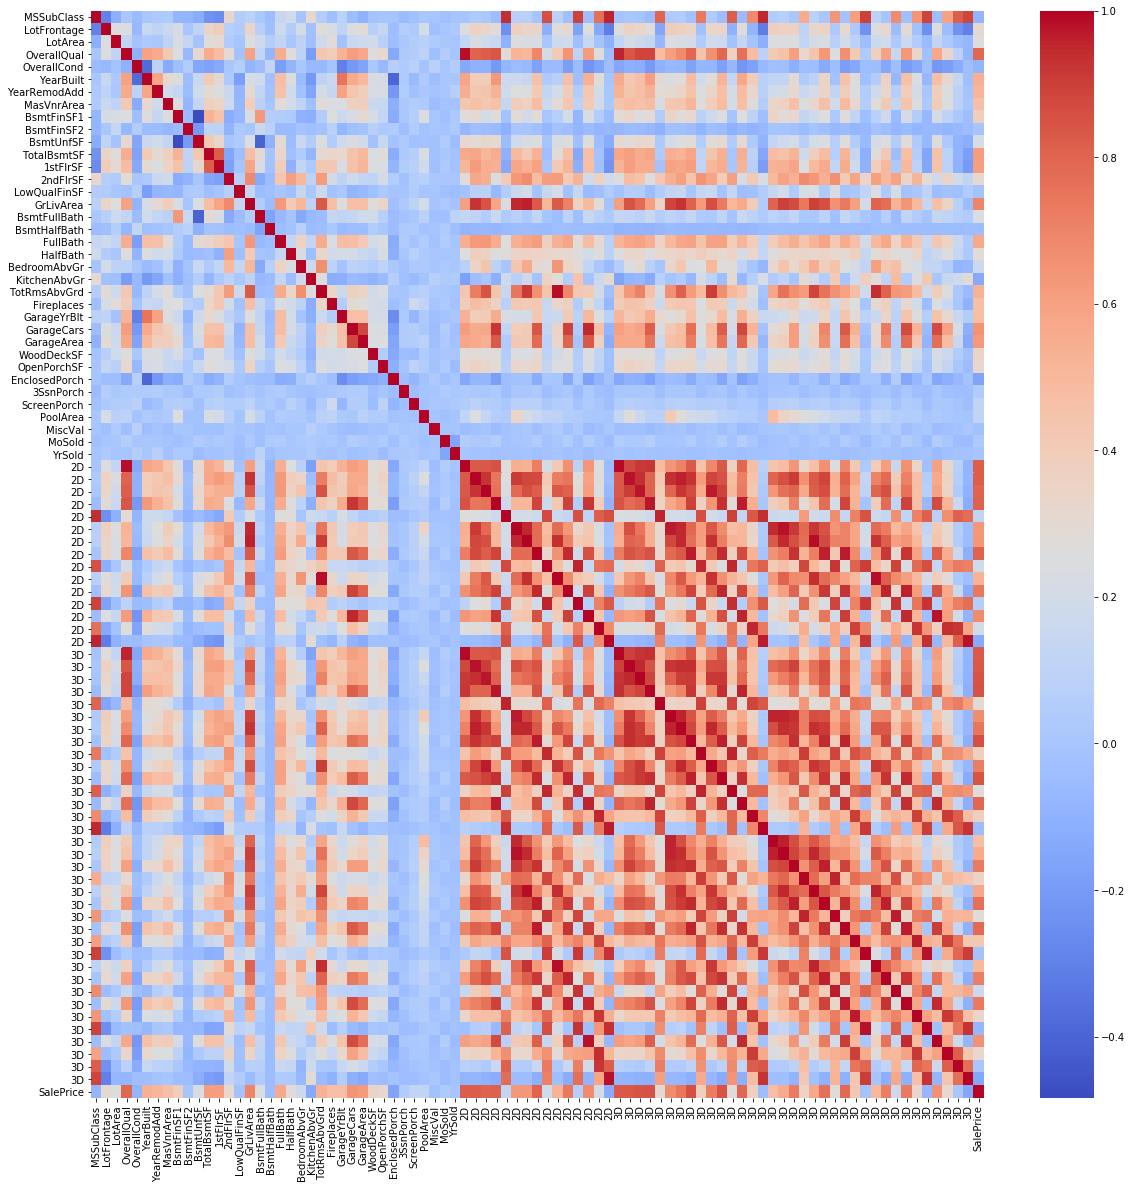

In [207]:
# ヒートマップ表示
%matplotlib inline
fig = plt.figure(figsize=(20, 20))
ax = fig.add_subplot(111)

ax = sns.heatmap(df_corr, cmap='coolwarm', xticklabels=feature_degrees, yticklabels=feature_degrees)

plt.show()

In [213]:
# VIFを求める
corr_mat = np.array(df_corr)
inv_corr_mat = np.linalg.inv(corr_mat)
vif_series = pd.Series(np.diag(inv_corr_mat), index=df_corr.columns)

display(vif_series.sort_values(ascending=False))

BsmtFinSF1       7.595533e+14
TotalBsmtSF      7.221628e+14
BsmtUnfSF        7.112252e+14
GrLivArea        1.417871e+14
2ndFlrSF         9.347080e+13
BsmtFinSF2       9.110547e+13
1stFlrSF         7.657184e+13
LowQualFinSF     1.209559e+12
3D               1.625053e+05
3D               1.593370e+05
3D               1.447424e+05
2D               1.022230e+05
3D               6.127374e+04
2D               3.772598e+04
3D               3.706132e+04
3D               3.690091e+04
3D               3.388028e+04
2D               3.252318e+04
2D               3.047538e+04
3D               2.900538e+04
3D               2.771300e+04
2D               2.400232e+04
3D               2.351880e+04
3D               2.336167e+04
3D               2.224689e+04
3D               1.905716e+04
3D               1.298987e+04
2D               1.213989e+04
2D               1.120777e+04
2D               1.103688e+04
2D               1.009007e+04
3D               9.252579e+03
3D               8.872901e+03
2D        

かなり高いものが揃っている。10以上だとあまり良くないらしいので必要な特徴量を再度吟味する必要があるかもしれない。

# 【問題10】
## （アドバンス課題）更新式の導出
最急降下法の更新式は以下でした。この式が導出される過程を説明してください。
$$
\theta_j := \theta_j - \alpha \frac{1}{m} \sum_{i=1}^{m}[(h_\theta(x^{(i)}) - y^{(i)} )x_{j}^{(i)}]
$$
以下の式から説明をはじめることができます。
$$
\theta_j := \theta_j - \alpha\frac{\partial}{\partial \theta_j}J(\theta) \\
$$
目的関数（損失関数）J(θ)は次の式です。
$$
J(\theta)=  \frac{1 }{ 2m}  \sum_{i=1}^{m} (h_\theta(x^{(i)})-y^{(i)})^2.
$$

# 導出
$$
\theta_j := \theta_j - \frac{\partial}{\partial \theta_j}J(\theta) \\
J(\theta)=  \frac{1 }{ 2m}  \sum_{i=1}^{m} (h_\theta(x^{(i)})-y^{(i)})^2
$$
より、
$$
\theta_j := \theta_j - \alpha\frac{\partial}{\partial \theta_j}\frac{1 }{ 2m}  \sum_{i=1}^{m} (h_\theta(x^{(i)})-y^{(i)})^2
$$
$$
\theta_j := \theta_j - \alpha\frac{1 }{ 2m}(\frac{\partial}{\partial \theta_j}  \sum_{i=1}^{m} (h_\theta(x^{(i)})-y^{(i)})^2)
$$
であるから、$\frac{\partial}{\partial \theta_j}\sum_{i=1}^{m}(h_\theta(x^{(i)})-y^{(i)})^2$を解く。
$$
\frac{\partial}{\partial \theta_j}\sum_{i=1}^{m}(h_\theta(x^{(i)})-y^{(i)})^2\\
=\frac{\partial}{\partial \theta_j}\sum_{i=1}^{m} [(h_\theta(x^{(i)}))^2-2h_\theta(x^{(i)})y^{(i)}+(y^{(i)})^2]\\
=\sum_{i=1}^{m}[\frac{\partial}{\partial \theta_j} [(h_\theta(x^{(i)}))^2-2h_\theta(x^{(i)})y^{(i)}+(y^{(i)})^2]]\\
$$
この時、$h_\theta(x) =  \theta_0 x_0 + \theta_1 x_1 + ... + \theta_j x_j + ... +\theta_n x_n.   (x_0 = 1)$より、
$$
\frac{\partial}{\partial \theta_j} [(h_\theta(x^{(i)}))^2-2h_\theta(x^{(i)})y^{(i)}+(y^{(i)})^2]\\
=2(h_\theta(x^{(i)}))\frac{\partial}{\partial \theta_j}h_\theta(x^{(i)})-2y^{(i)}\frac{\partial}{\partial \theta_j}h_\theta(x^{(i)})\\
=2[(h_\theta(x^{(i)}))-y^{(i)}]\frac{\partial}{\partial \theta_j}h_\theta(x^{(i)})\\
=2[(h_\theta(x^{(i)}))-y^{(i)}]x_{j}^{(i)}
$$
よって、
$$
\frac{\partial}{\partial \theta_j}\sum_{i=1}^{m}(h_\theta(x^{(i)})-y^{(i)})^2\\
=\sum_{i=1}^{m}2[(h_\theta(x^{(i)}))-y^{(i)}]x_{j}^{(i)}\\
=2\sum_{i=1}^{m}[((h_\theta(x^{(i)}))-y^{(i)})x_{j}^{(i)}]
$$
である。したがって、
$$
\theta_j := \theta_j - \alpha\frac{1 }{ 2m}(\frac{\partial}{\partial \theta_j}  \sum_{i=1}^{m} (h_\theta(x^{(i)})-y^{(i)})^2)
$$
$$
\theta_j := \theta_j - \alpha\frac{1 }{ 2m}(2\sum_{i=1}^{m}[((h_\theta(x^{(i)}))-y^{(i)})x_{j}^{(i)}])
$$
$$
\theta_j := \theta_j - \alpha \frac{1}{m} \sum_{i=1}^{m}[(h_\theta(x^{(i)}) - y^{(i)} )x_{j}^{(i)}]
$$

# 【問題11】
## （アドバンス課題）局所最適解の問題
最急降下法には一般的に局所最適解の問題があります。しかし、線形回帰では学習を続ければ必ず最適解を求めることができます。それはなぜか数式やグラフを用いて説明してください。